# Question1

## Ans 1.1

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [2]:
data = pd.read_excel ('AirQuality.xlsx')
data.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,2004-03-10,18:00:00,2.6,1360.00,150,11.881723,1045.50,166.0,1056.25,113.0,1692.00,1267.50,13.60,48.875001,0.757754
1,2004-03-10,19:00:00,2.0,1292.25,112,9.397165,954.75,103.0,1173.75,92.0,1558.75,972.25,13.30,47.700000,0.725487
2,2004-03-10,20:00:00,2.2,1402.00,88,8.997817,939.25,131.0,1140.00,114.0,1554.50,1074.00,11.90,53.975000,0.750239
3,2004-03-10,21:00:00,2.2,1375.50,80,9.228796,948.25,172.0,1092.00,122.0,1583.75,1203.25,11.00,60.000000,0.786713
4,2004-03-10,22:00:00,1.6,1272.25,51,6.518224,835.50,131.0,1205.00,116.0,1490.00,1110.00,11.15,59.575001,0.788794


Text(0, 0.5, 'CO(GT)')

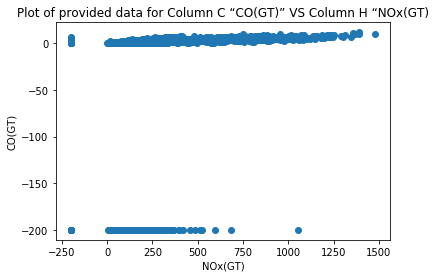

In [3]:
X= data['NOx(GT)']
X = X.values.reshape(-1, 1)
Y= data['CO(GT)']
Y = Y.values.reshape(-1, 1)
plt.scatter(X, Y)
plt.title("Plot of provided data for Column C “CO(GT)” VS Column H “NOx(GT)")
plt.xlabel("NOx(GT)")
plt.ylabel("CO(GT)")

### The data with invalid values (noise) for few columns must not be removed as this can result in loss of useful data points. Few rows have -200 for CO(GT) and NOx(GT) which we call as noise and it makes the graph improper. We will treat them as missing data and replace those values with the constant 0.

Text(0, 0.5, 'CO(GT)')

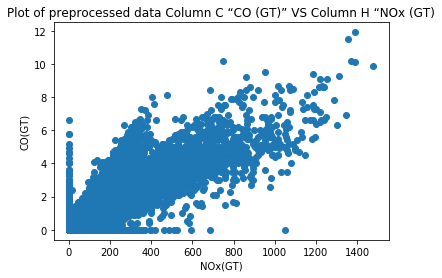

In [4]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values =-200, strategy = 'constant', fill_value = 0)
imputer.fit(X)
SimpleImputer()
X = imputer.transform(X)
imputer = SimpleImputer(missing_values = -200, strategy = 'constant', fill_value = 0)
imputer.fit(Y)
Y = imputer.transform(Y)
plt.scatter(X, Y)
plt.title("Plot of preprocessed data Column C “CO (GT)” VS Column H “NOx (GT)")
plt.xlabel("NOx(GT)")
plt.ylabel("CO(GT)")

### As we can see in the graph, that both the variables CO(GT) and NOx(GT) have a linear relationship. As the X(NOx(GT)) is changing, it leads to change in y (CO(GT)). So, we can derive a linear equation which can fit these two columns and give us a linear regression model.

In [5]:
# Split test and train data to check the error in prediction, use train_test_split for the same

from sklearn.model_selection import train_test_split 
x_train, x_test, y_train, y_test = train_test_split(X, Y, train_size=0.7,test_size=0.3,random_state=0)
lin_reg = LinearRegression()
lin_reg.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [6]:
print('The coefficient found by the linear regression model is ',lin_reg.coef_)
print('The intercept found by the linear regression model is ',lin_reg.intercept_)

The coefficient found by the linear regression model is  [[0.00590583]]
The intercept found by the linear regression model is  [0.5638808]


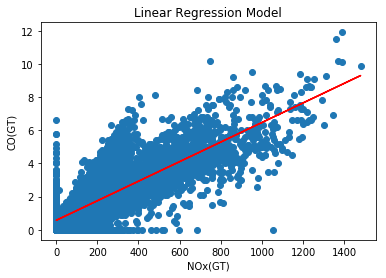

In [7]:
plt.scatter(X, Y)
plt.plot(x_train, lin_reg.predict(x_train), color='red')
plt.title('Linear Regression Model')
plt.xlabel("NOx(GT)")
plt.ylabel("CO(GT)")
plt.show()

In [8]:
from sklearn.metrics import mean_squared_error, r2_score

y_pred = lin_reg.predict(x_test)

print("Mean squared error = %.2f" % mean_squared_error(y_test, y_pred))

# Explained variance score: 1 is perfect prediction.
# R^2 (coefficient of determination) regression score function.
# Best possible score is 1.0, a
# a constant model that always predicts the expected value of y, disregarding the input features, 
#would get a R^2 score of 0.0.

print('Variance score = %.2f' % r2_score(y_test, y_pred))

Mean squared error = 0.83
Variance score = 0.64


### The value of CO is linearly dependent on NOx which is evident from the above model and its graph. As the variance score is more than .5 and near to 1, the prediction is pretty decent and we can use linear regression model for this problem.

## Ans 1.2

### Instead of using sklearn library, the below algorithm using numpy can be used to build a linear regression model.

In [9]:
import numpy as np
import pandas as pd
from pandas import ExcelWriter
from pandas import ExcelFile

df = pd.read_excel ('AirQuality.xlsx')
y = df['CO(GT)']
x = df['NOx(GT)']

x[x < 0] = 0
y[y < 0] = 0

N = len(x)
x = np.array(x)

y = np.array(y)

sum_x = sum(x)
sum_y = sum(y)
sum_x_square = sum(np.square(x))
sum_xy = sum(x * y)

A =np.array([[N,sum_x], [sum_x, sum_x_square]])

B = np.array([[sum_y], [sum_xy]])

parm = np.linalg.solve(A,B)

w0 = parm[0]
w1 = parm[1]
print('Coeffecient found by numpy ibrary is: ',w1)
print('Intercept found by numpy ibrary is: ',w0)

Coeffecient found by numpy ibrary is:  [0.00586651]
Intercept found by numpy ibrary is:  [0.57090731]


C:\Users\rmittal5\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.
C:\Users\rmittal5\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()


### The above model using numpy functions takes more time when the data is big. Whereas LinearRegression from sklearn takes less time. Therefore, the performance of sklearn is better than numpy.

# ----------------------------------------------------------------------------------------------------------------

# Question 2

## Ans 2.1

In [61]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error
import math
from sklearn.linear_model import LinearRegression


### Application of Batch gradient descent algorithm to design model which can predict value of CO based on the given features

In [62]:
data = pd.read_excel ('AirQuality.xlsx')
df = pd.DataFrame(data, columns=['CO(GT)','PT08.S1(CO)','NMHC(GT)','PT08.S2(NMHC)','NOx(GT)','PT08.S3(NOx)','NO2(GT)','T','RH','AH'])
df.shape

(9357, 10)

In [63]:
#Removing the noise from data. In our case, we are assuming the values -200 as noise in column CO(GT)
indexNames = df[ df['CO(GT)'] == -200 ].index
df.drop(indexNames , inplace=True)
df.shape

(7674, 10)

In [64]:
#Removing outliers from the data using z score
from scipy import stats
z = np.abs(stats.zscore(df))
df = df[(z < 3).all(axis=1)]
X = pd.DataFrame(df, columns=['PT08.S1(CO)','NMHC(GT)','PT08.S2(NMHC)','NOx(GT)','PT08.S3(NOx)','NO2(GT)','T','RH','AH'])

In [65]:
# Standardising the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=['PT08.S1(CO)','NMHC(GT)','PT08.S2(NMHC)','NOx(GT)','PT08.S3(NOx)','NO2(GT)','T','RH','AH'])

C:\Users\rmittal5\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\rmittal5\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [66]:
Y = pd.DataFrame(df, columns=['CO(GT)'])

In [67]:
X = X.to_numpy()
X = np.matrix(X)
X = np.c_[np.ones((X.shape[0],1)),X]

In [68]:
Y = pd.DataFrame(df, columns=['CO(GT)'])
Y = Y.to_numpy()
Y = np.matrix(Y)

In [69]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, train_size=0.7,test_size=0.3,random_state=100)

In [70]:
def compute_mean_square_error(X, y, theta):
    #summands = np.power(X * theta.T - y, 2)
    #return np.sum(summands) / (2 * len(X))
    tobesummed = np.power(((X @ theta.T)-y),2)
    return np.sum(tobesummed)/(2 * len(X))

In [71]:
def gradient_descent(X, y, learning_rate, num_iterations):
    num_parameters = X.shape[1]                                 # dim theta
    #theta = np.zeros(1,[X.shape[1]])
    theta = np.matrix([0.0 for i in range(num_parameters)])     # init theta
    cost = [0.0 for i in range(num_iterations)]
    #cost = np.zeros(num_iterations)
    for it in range(num_iterations):
        error = np.repeat((X * theta.T) - y, num_parameters, axis=1)
        error_derivative = np.sum(np.multiply(error, X), axis=0)
        theta = theta - (learning_rate / len(y)) * error_derivative
        cost[it] = compute_mean_square_error(X, y, theta)
    return theta, cost

In [72]:
theta, cost = gradient_descent(X_train, Y_train,0.005, 30000)

In [73]:
Y_predict_test = X_test* theta.T

In [74]:
from sklearn.metrics import mean_squared_error, r2_score
import math
print("Mean squared error = %.2f" % mean_squared_error(Y_test, Y_predict_test))
print('Variance score = %.2f' % r2_score(Y_test, Y_predict_test))
rmse = math.sqrt(compute_mean_square_error(X_test, Y_test, theta))
print('The root mean square error of the trained model is ',rmse)
rse = (rmse**2)*X_test.shape[0]
rse/= X_test.shape[0]-2
print('The residual standard error of the trained model is',rse)

Mean squared error = 0.17
Variance score = 0.89
The root mean square error of the trained model is  0.2883209052503766


In [75]:
print('The coefficients of the trained model with respect to all features are ', theta) 

The coefficients of the trained model with respect to all features are  [[ 2.04290926  0.2211138  -0.00462795  0.89501681  0.25152008  0.21069535
   0.09010353 -0.18820394 -0.07364045  0.10427158]]


The residual standard error of the trained model is 0.08321351098059644


In [77]:
Y_predict = X* theta.T
Y_pred = pd.DataFrame(Y_predict)

In [78]:
Y = pd.DataFrame(Y)

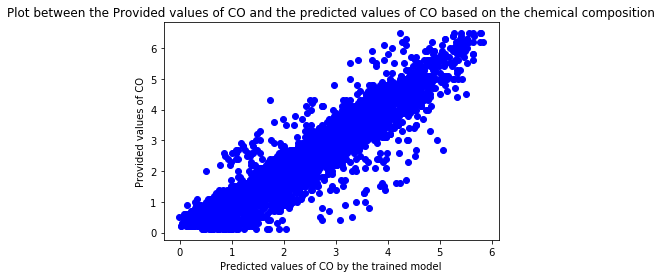

In [79]:
plt.scatter(Y_pred, Y, color='blue')
plt.title('Plot between the Provided values of CO and the predicted values of CO based on the chemical composition')
plt.xlabel('Predicted values of CO by the trained model')
plt.ylabel('Provided values of CO')
plt.show()

In [80]:
#We are assuming thet the day is good for living when the CO(GT) has value lower than 1
#So, the number of days which can be predicted as good for living as per the data are:
indexNames = Y_pred[ Y_pred[0] > 1 ].index
Y_pred.drop(indexNames , inplace=True)
print('Number of days good for living are', Y_pred.shape[0])

Number of days good for living are 1360


### Application of Stochastic gradient descent algorithm to design model which can predict value of CO based on the given features

In [81]:
X = pd.DataFrame(df, columns=['PT08.S1(CO)','NMHC(GT)','PT08.S2(NMHC)','NOx(GT)','PT08.S3(NOx)','NO2(GT)','T','RH','AH'])
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=['PT08.S1(CO)','NMHC(GT)','PT08.S2(NMHC)','NOx(GT)','PT08.S3(NOx)','NO2(GT)','T','RH','AH'])

C:\Users\rmittal5\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\rmittal5\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [82]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=['PT08.S1(CO)','NMHC(GT)','PT08.S2(NMHC)','NOx(GT)','PT08.S3(NOx)','NO2(GT)','T','RH','AH'])

In [83]:
Y = pd.DataFrame(df, columns=['CO(GT)'])

In [84]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, train_size=0.7,test_size=0.3,random_state=100)

In [85]:
model = LinearRegression()
model.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [86]:
#Checking coefficients and intercept from the normal equation
print('Coeffecients are: ', model.coef_)
print('Intercept is: ',model.intercept_)

Coeffecients are:  [[ 0.22116286 -0.00462589  0.89504253  0.2515051   0.21076691  0.09013421
  -0.1890094  -0.07422571  0.10494371]]
Intercept is:  [2.04290761]


In [87]:
sgd_reg = SGDRegressor(max_iter = 10000, tol = 0.001, eta0 = 1e-3)
sgd_reg.fit(X_train,Y_train)

C:\Users\rmittal5\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
       eta0=0.001, fit_intercept=True, l1_ratio=0.15,
       learning_rate='invscaling', loss='squared_loss', max_iter=10000,
       n_iter=None, n_iter_no_change=5, penalty='l2', power_t=0.25,
       random_state=None, shuffle=True, tol=0.001, validation_fraction=0.1,
       verbose=0, warm_start=False)

In [88]:
print('The coefficients of the trained model with respect to all features are ', sgd_reg.coef_)

The coefficients of the trained model with respect to all features are  [ 0.31946773  0.02851964  0.59759027  0.30793798  0.05737168  0.08865794
 -0.01079663 -0.02727476  0.00820636]


In [89]:
print('The intercept of the trained model is ', sgd_reg.intercept_)

The intercept of the trained model is  [2.03880837]


In [90]:
sgd_rmse = math.sqrt(mean_squared_error(sgd_reg.predict(X_test),Y_test))
sgd_rse = (sgd_rmse**2)*X_test.shape[0]
sgd_rse/= X_test.shape[0]-2
print('The root mean square error of the trained model is ',sgd_rmse)
print('The residual standard error of the trained model is',sgd_rse)
print('The r2 score of the model is ',sgd_reg.score(X_test,Y_test))

The root mean square error of the trained model is  0.4274688009790324
The residual standard error of the trained model is 0.18291546551117432
The r2 score of the model is  0.878767234595982


In [91]:
Y = pd.DataFrame(Y)

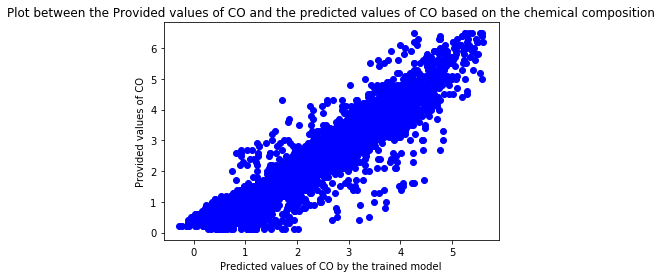

In [92]:
plt.scatter(sgd_reg.predict(X), Y, color='blue')
plt.title('Plot between the Provided values of CO and the predicted values of CO based on the chemical composition')
plt.xlabel('Predicted values of CO by the trained model')
plt.ylabel('Provided values of CO')
plt.show()

In [93]:
#We are assuming thet the day is good for living when the CO(GT) has value lower than 1
#So, the number of days which can be predicted as good for living as per the data are:
Y_pred = pd.DataFrame(sgd_reg.predict(X))
indexNames = Y_pred[Y_pred[0] > 1 ].index
Y_pred.drop(indexNames , inplace=True)
print('Number days good for living are', Y_pred.shape[0])

Number days good for living are 1295


### Application of Mini Batch gradient descent algorithm to design model which can predict value of CO based on the given features

In [94]:
X = pd.DataFrame(df, columns=['PT08.S1(CO)','NMHC(GT)','PT08.S2(NMHC)','NOx(GT)','PT08.S3(NOx)','NO2(GT)','T','RH','AH'])

In [95]:
# Standardising the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=['PT08.S1(CO)','NMHC(GT)','PT08.S2(NMHC)','NOx(GT)','PT08.S3(NOx)','NO2(GT)','T','RH','AH'])

C:\Users\rmittal5\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\rmittal5\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [96]:
X = X.to_numpy()
#X = np.matrix(X)
Y = pd.DataFrame(df, columns=['CO(GT)'])
Y = Y.to_numpy()

In [97]:
# Splitting the data into test and training
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, train_size=0.7,test_size=0.3,random_state=100)

In [98]:
model = LinearRegression()
model.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [99]:
#Checking coefficients and intercept from the normal equation
print('Coeffecients are: ', model.coef_)
print('Intercept is: ',model.intercept_)

Coeffecients are:  [[ 0.22116286 -0.00462589  0.89504253  0.2515051   0.21076691  0.09013421
  -0.1890094  -0.07422571  0.10494371]]
Intercept is:  [2.04290761]


In [100]:
mb_learning_rate = 0.005
mb_max_iteration = 30000
batch_size = 500

In [101]:
theta = np.zeros((X.shape[1]+1, 1))
mb_theta = np.zeros((X.shape[1]+1, 1))

In [102]:
def h (theta, X) :
    tempX = np.ones((X.shape[0], X.shape[1] + 1))
    tempX[:,1:] = X
    return np.matmul(tempX, theta)

In [103]:
def loss (theta, X, Y) :
    return np.average(np.square(Y - h(theta, X))) / 2

In [104]:
def gradient (theta, X, Y) :
    tempX = np.ones((X.shape[0], X.shape[1] + 1))
    tempX[:,1:] = X
    d_theta = - np.average((Y - h(theta, X)) * tempX, axis= 0)
    d_theta = d_theta.reshape((d_theta.shape[0], 1))
    return d_theta

In [105]:
def minibatch_gradient_descent (theta, X, Y, learning_rate, max_iteration, batch_size) :
    cost = np.zeros(max_iteration)
    for i in range(max_iteration) :
        for j in range(0, X.shape[0], batch_size):
            d_theta = gradient (theta, X[j:j+batch_size,:], Y[j:j+batch_size,:])
            theta = theta - learning_rate * d_theta
    
        cost[i] = loss(theta, X, Y)
    return theta, cost

In [106]:
mb_theta, mb_cost = minibatch_gradient_descent (mb_theta, X_train, Y_train, mb_learning_rate, mb_max_iteration, batch_size)

In [107]:
print('The coefficients of the trained model with respect to all features are ', mb_theta)

The coefficients of the trained model with respect to all features are  [[ 2.03996561]
 [ 0.23519721]
 [-0.00729271]
 [ 0.88643732]
 [ 0.25734081]
 [ 0.210531  ]
 [ 0.08087086]
 [-0.1761525 ]
 [-0.06754896]
 [ 0.09522465]]


In [108]:
tempX = np.ones((X_test.shape[0], X_test.shape[1] + 1))
tempX[:,1:] = X_test
Y_predict_test = np.matmul(tempX, mb_theta)
Y_pred_test = pd.DataFrame(Y_predict_test)

In [109]:
from sklearn.metrics import mean_squared_error, r2_score
import math
mb_rmse = math.sqrt(mean_squared_error(Y_test, Y_pred_test))
print("Mean squared error = %.2f" % mb_rmse)
print('Variance score = %.2f' % r2_score(Y_test, Y_pred_test))
mb_rse = (mb_rmse**2)*X_test.shape[0]
mb_rse/= X_test.shape[0]-2
print("Residual standard error = %.2f" % mb_rse)
#mb_rmse = math.sqrt(loss(mb_theta, X_test, Y_test))
#print('The root mean square error of the trained model is ',mb_rmse)

Mean squared error = 0.41
Variance score = 0.89
Residual standard error = 0.17


In [110]:
temX = np.ones((X.shape[0], X.shape[1] + 1))
temX[:,1:] = X
Y_predict = np.matmul(temX, mb_theta)
Y_pred = pd.DataFrame(Y_predict)

In [111]:
Y = pd.DataFrame(Y)

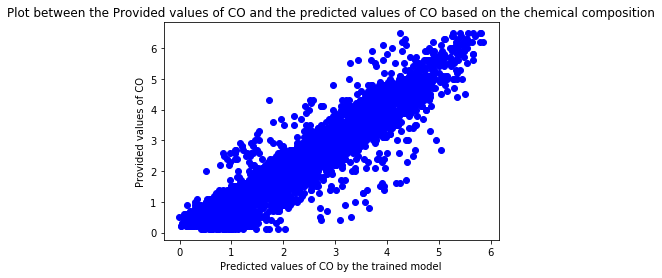

In [112]:
plt.scatter(Y_pred, Y, color='blue')
plt.title('Plot between the Provided values of CO and the predicted values of CO based on the chemical composition')
plt.xlabel('Predicted values of CO by the trained model')
plt.ylabel('Provided values of CO')
plt.show()

In [113]:
#We are assuming thet the day is good for living when the CO(GT) has value lower than 1
#So, the number of days which can be predicted as good for living as per the data are:
indexNames = Y_pred[ Y_pred[0] > 1 ].index
Y_pred.drop(indexNames , inplace=True)
print('Number of days good for living are', Y_pred.shape[0])

Number of days good for living are 1373


## Ans 2.2
### Recursive Feature Elimination (RFE) as its name suggests recursively removes features, builds a model using the remaining attributes and calculates model accuracy. RFE is able to work out the combination of attributes that contribute to the prediction on the target variable (or class). 

In [114]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import RidgeCV, LassoCV, Ridge, Lasso
data = pd.read_excel ('AirQuality.xlsx')
df = pd.DataFrame(data, columns=['CO(GT)','PT08.S1(CO)','NMHC(GT)','PT08.S2(NMHC)','NOx(GT)','PT08.S3(NOx)','NO2(GT)','T','RH','AH'])
indexNames = df[ df['CO(GT)'] == -200 ].index
df.drop(indexNames , inplace=True)
from scipy import stats
z = np.abs(stats.zscore(df))
df = df[(z < 3).all(axis=1)]
X = pd.DataFrame(df, columns=['PT08.S1(CO)','NMHC(GT)','PT08.S2(NMHC)','NOx(GT)','PT08.S3(NOx)','NO2(GT)','T','RH','AH'])
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=['PT08.S1(CO)','NMHC(GT)','PT08.S2(NMHC)','NOx(GT)','PT08.S3(NOx)','NO2(GT)','T','RH','AH'])
Y = pd.DataFrame(df, columns=['CO(GT)'])
model = LinearRegression()
#Initializing RFE model
rfe = RFE(model, 4)
#Transforming data using RFE
X_rfe = rfe.fit_transform(X,Y)  
#Fitting the data to model
model.fit(X_rfe,Y)
print(rfe.support_)
print(rfe.ranking_)


[ True False  True  True  True False False False False]
[1 6 1 1 1 3 2 5 4]


C:\Users\rmittal5\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\rmittal5\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\Users\rmittal5\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [115]:
print('The best attributes which can suggest good air quality are: ',X.columns[0], X.columns[2],X.columns[3],X.columns[4])

The best attributes which can suggest good air quality are:  PT08.S1(CO) PT08.S2(NMHC) NOx(GT) PT08.S3(NOx)


### Using Recursive Feature Elimination (RFE), the best attributes which can suggest good air quality are : PT08.S1(CO),  PT08.S2(NMHC), NOx(GT) and PT08.S3(NOx)

## Ans 2.3: 
### The approach of gradient descent seem to be appropriate in this case study. The execution time of the stochastic gradient descent was lesser but the accuracy of the gradient descent was better. The mini batch gradient descent took more time. 
### The residual standard error of the trained model with Gradient descent is 0.0.08321351098059644
### The variance of the trained model with Gradient descent is 0.89
### The residual standard error of the trained model with Stochastic gradient descent is  0.18291546551117432
### The variance of the trained model with Stochastic gradient descent is 0.878767234595982
### The residual standard error of the trained model with mini batch gradient descent is  0.17
### The variance of the trained model with  mini batch gradient descent is 0.89
### As we can see, the least Residual standard error is of Gradient descent and also the variance is nearest to 1 for gradient descent.
### Based on the above facts, I found the Gradient descent algorithm the best approach in this particular case study.
